# Simulating data

Generating simulated data can be a useful exercise for:
    - making concrete predictions about the data under a certain hypothesis
    - test analysis procedures
    - estimating the probability of outcomes (without collecting heaps of data)
    - see what happens when assumptions of algorithms are violated

## A simple case of comparing groups

As an introduction, we will simulate predicted data with a difference in their means

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


Here, we draw 500 samples from a Gaussian distribution with mean 0 (group1) and 2 (group2) and a standard deviation of 1

In [4]:
df = pd.DataFrame()
df['group1'] = np.random.normal(loc=0, scale=1, size=500)
df['group2'] = np.random.normal(loc=2, scale=1, size=500)

Histogram of the data

In [5]:
def plot(df):
    sns.distplot(df['group1'].values)
    sns.distplot(df['group2'].values)
    plt.show()

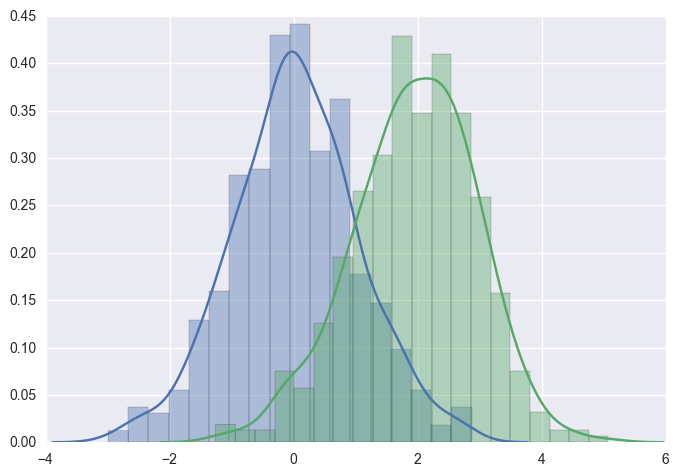

In [6]:
plot(df)

If we now perform a t-test to check if there is a difference between the means of the two groups, we should get a significant result. 

In [7]:
from scipy.stats import ttest_ind
t,p = ttest_ind(df['group1'].values, df['group2'].values)
print('P-values of group difference test: %.3f' % p)

P-values of group difference test: 0.000


We can also test if this is a fluke by repeating the random draw n times and see how many times we observe a significant p-value

In [8]:
number_of_repetitions = 1000
significant_results = 0

for n in range(0,number_of_repetitions):
    df = pd.DataFrame()
    df['group1'] = np.random.normal(loc=0, scale=1, size=500)
    df['group2'] = np.random.normal(loc=2, scale=1, size=500)
    t,p = ttest_ind(df['group1'].values, df['group2'].values)
    if p < 0.05:
        significant_results += 1

ratio = float(significant_results)/number_of_repetitions
print('Ratio of significant results when a true difference is simulated: %.3f' % ratio)

Ratio of significant results when a true difference is simulated: 1.000


We can also play around with the parameters, e.g. decrease the mean difference or increase the variance

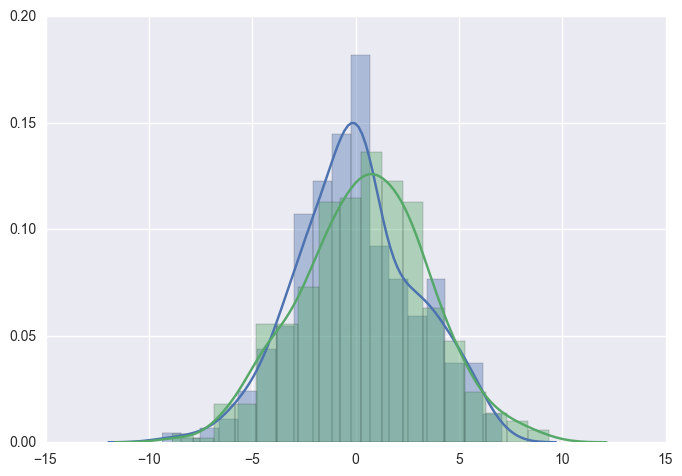

Ratio of significant results when a true difference is simulated: 0.749


In [9]:
number_of_repetitions = 1000
significant_results = 0

for n in range(0,number_of_repetitions):
    df = pd.DataFrame()
    df['group1'] = np.random.normal(loc=0, scale=3, size=500)
    df['group2'] = np.random.normal(loc=0.5, scale=3, size=500)
    t,p = ttest_ind(df['group1'].values, df['group2'].values)
    if p < 0.05:
        significant_results += 1

ratio = float(significant_results)/number_of_repetitions
plot(df)
print('Ratio of significant results when a true difference is simulated: %.3f' % ratio)

## Simulating linear relationships

We can also simulate linear relationships, e.g. to test regression models. We just needs create array with the linear model formula: 

$y= \beta*X + c$

In [12]:
df = pd.DataFrame()
df['x'] = np.arange(0,10,0.1)
df['y'] = 0.5*df['x'].values + 1

/Users/joebathelt1/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


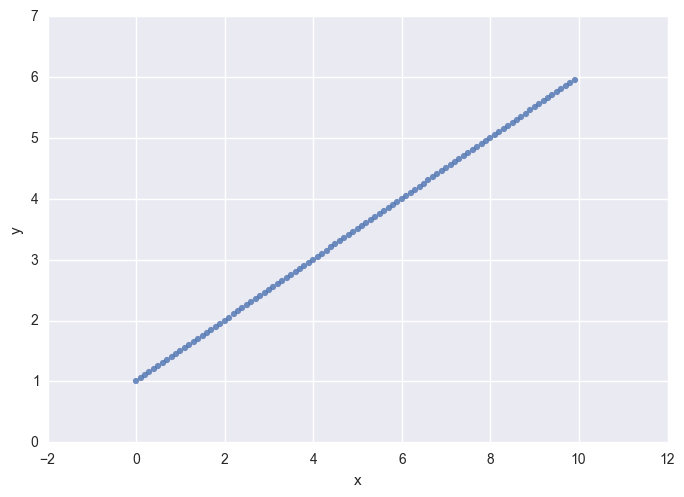

In [13]:
sns.regplot(x="x", y="y", fit_reg=False, data=df)

Usually, there would be some noise due to the influence of other (potentially not included) variables and measurement error. We can add some Gaussian noise to simulate this:

In [16]:
df['y'] = 0.5*df['x'].values + 1 + 0.1*np.random.normal(loc=0, scale=1, size=size(df['x'].values))

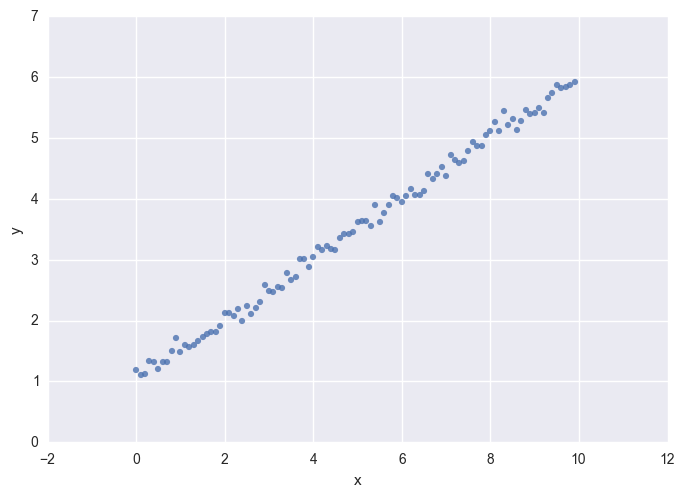

In [17]:
sns.regplot(x="x", y="y", fit_reg=False, data=df)

The simulated data can be plucked into a regression model to see if we can recover the parameters used in the simulation, i.e. slope and intercept

In [18]:
import statsmodels.formula.api as smf
mod = smf.ols(formula='y ~ x', data=df) # this implementation contains an intercept by default
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.061e+04
Date:                Tue, 24 Jan 2017   Prob (F-statistic):          9.68e-116
Time:                        12:46:52   Log-Likelihood:                 89.142
No. Observations:                 100   AIC:                            -174.3
Df Residuals:                      98   BIC:                            -169.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0190      0.020     51.213      0.0

Again, we can also what happens when we change the parameters, e.g. increase the amount of noise

In [21]:
y_beta = list()
noise_betas = np.arange(0.1,10,0.1)

for noise_beta in noise_betas:
    df['y'] = 0.5*df['x'].values + 1 + noise_beta*np.random.normal(loc=0, scale=1, size=size(df['x'].values))
    mod = smf.ols(formula='y ~ x', data=df)
    res = mod.fit()
    y_beta.append(res.params['x'])

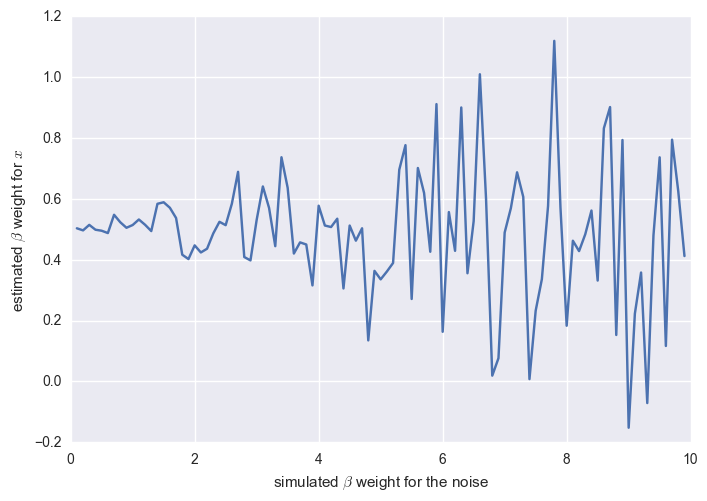

In [22]:
plt.plot(noise_betas, y_beta)
plt.ylabel(r'estimated $\beta$ weight for $x$')
plt.xlabel(r'simulated $\beta$ weight for the noise')

From this we can see that there is considerable variation in the beta weights predicted by the regression model when the amount of added noise is increased

## Simulating the influence of multiple continuous variables

We can extend the simulation to include multiple variables, i.e. for multiple regression analysis

True model: $y= 0.6x_{1} + 0.2x_{2} + 0.2\epsilon$

In [24]:
df = pd.DataFrame()
df['x1'] = np.random.normal(loc=0, scale=1, size=100)
df['x2'] = np.random.normal(loc=2, scale=1, size=100)
noise = 0.1*np.random.normal(loc=0, scale=1, size=size(df['x1'].values))

df['y'] = 0.6*df['x1'].values + 0.3*df['x2'].values + 1 + 0.1*noise

In [25]:
import statsmodels.formula.api as smf
mod = smf.ols(formula='y ~ x1 + x2', data=df) # this implementation contains an intercept by default
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.658e+05
Date:                Tue, 24 Jan 2017   Prob (F-statistic):          4.62e-182
Time:                        12:47:20   Log-Likelihood:                 320.99
No. Observations:                 100   AIC:                            -636.0
Df Residuals:                      97   BIC:                            -628.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0008      0.002    506.050      0.0

Again, we can add more variables, adjust the amount of noise, and play around with the parameters to see how the results of the analysis change 

## Manipulating the similarity between variables

Here, we manipulate how correlated the variables are. NumPy offers the 'multivariate_normal' function to do exactly that

Let's say we want to generate two variables that correlated with 0.5:

In [36]:
r = np.array([[1, 0.5], 
              [0.5, 1]])

We keep the mean the same as in the previous examples: 

In [27]:
means = np.array([0, 2])

Generating the sample: 

In [29]:
y = np.random.multivariate_normal(means, r, size=1000)

In [30]:
df = pd.DataFrame()
df['x1'] = y[:, 0]
df['x2'] = y[:, 1]

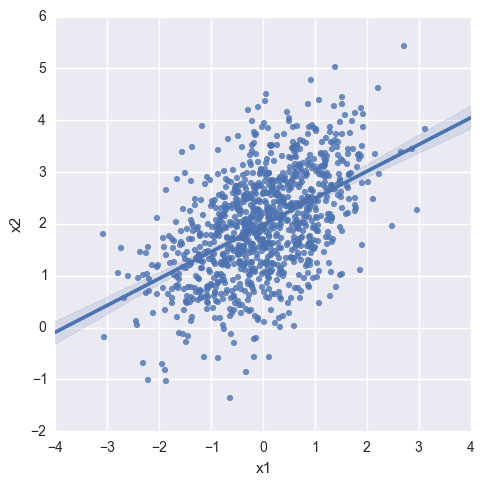

In [31]:
sns.lmplot(x='x1', y='x2', data=df)

We can check the correlation between the variables: 

In [35]:
df.corr()

,x1,x2
x1,1.000000,0.495303
x2,0.495303,1.000000


## Simulating more complex network structure

We can also generate networks with a known network structure to test if the structure can be recoverd by a modularity algorithm

In [37]:
def random_network_with_modules(size, number_of_modules, p_in, p_out):
    #================================
    # Generate a random network with modules
    #================================
    """
    inputs:
    size: number of nodes
    number_of_modules: number of modules
    p_in: connection probability within modules
    p_out: connection probability ouside modules

    outputs:
    random network with modular structure
    
    written by Joe Bathelt, PhD
    MRC Cognition & Brain Sciences Unit
    Oct 2016
    """

    import numpy as np

    module_size = round(float(size)/number_of_modules)
    matrix = np.zeros(shape=[size,size])
    
    for k in np.arange(0,number_of_modules,1):
        
        # positive connections
        for i in np.arange(0, module_size, 1):
            for j in np.arange(0, module_size, 1):
                if np.random.permutation(10)[0] < 10*p_in:   # Create connections with a certain probability
                    random_weight = np.random.uniform(low=0.1, high=1.0)
                    matrix[int(i+k*module_size),int(j+k*module_size)] = random_weight
                    matrix[int(j+k*module_size),int(i+k*module_size)] = random_weight


        # negative connections
        for i in np.arange((k+1)*module_size, len(matrix), 1):
            for j in np.arange(k*module_size, (k+1)*(module_size), 1):
                if np.random.permutation(10)[0] < 10*p_out:
                    random_weight = np.random.uniform(low=0.1, high=1.0)
                    matrix[int(i),int(j)] = random_weight
                    matrix[int(j),int(i)] = random_weight
                    
    return matrix

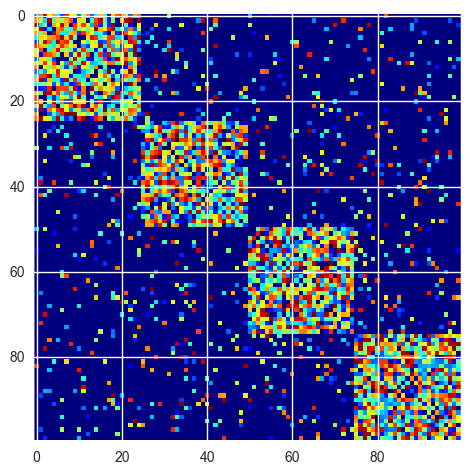

In [42]:
network = random_network_with_modules(100,4,0.7,0.1)

plt.imshow(network, interpolation='none', cmap='jet')

## Conclusion

The trick to simulating data is to be clear about the underlying structure that one expects in the data. If one assumes a mean differences between two variables that have a normal distribution, then this is exactly what the simulation should perform. Once the ideal case is established, one can test if the assumptions are violated to different degrees or what happens when noise is added etc. 
In more complex scenarios, it is important to understand what the algorithm is manipulating. For instance, if the algorithm tries to create groupings from the covariance matrix. Then, the simulation should create a covariance matrix with a desired structure. 